# Part I - Airline On-Time Performance Data
## by Stephanie Truchan

## Introduction
> "This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS)."

> Source: https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D

> This data covers the years 1987 - 2008. It also includes information about airport codes, airplanes models, carriers and variable descriptions

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [231]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sb
import os
import glob

%matplotlib inline

### Gather Data


In [99]:
pd.set_option('display.max_columns', None)

# Get a feel for what is in a single year's file
test_df = pd.read_csv('2008.csv')
test_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,N240WN,68.0,70.0,55.0,16.0,18.0,HOU,LIT,393,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,N523SW,82.0,85.0,71.0,2.0,5.0,HOU,MAF,441,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,N280WN,87.0,85.0,71.0,-4.0,-6.0,HOU,MAF,441,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,N308SA,120.0,130.0,108.0,-2.0,8.0,HOU,MCO,848,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,N462WN,123.0,130.0,107.0,16.0,23.0,HOU,MCO,848,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [499]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [100]:
# See what values are possible for "Cancelled"
test_df.Cancelled.value_counts()

0    2324775
1      64442
Name: Cancelled, dtype: int64

In [101]:
# Get a feel for what is in the airports file
airports_df = pd.read_csv('airports.csv')
airports_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [102]:
# Get info on datatypes and # of entries for airports
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   iata     3376 non-null   object 
 1   airport  3376 non-null   object 
 2   city     3364 non-null   object 
 3   state    3364 non-null   object 
 4   country  3376 non-null   object 
 5   lat      3376 non-null   float64
 6   long     3376 non-null   float64
dtypes: float64(2), object(5)
memory usage: 184.8+ KB


In [103]:
# Get a feel for what is in the carriers file
carriers_df = pd.read_csv('carriers.csv')
# Get a feel for what is in the carriers file
carriers_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [104]:
# Get info on datatypes and # of entries for carriers
# Get a feel for what is in the carriers file
carriers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1490 non-null   object
 1   Description  1491 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [105]:
# Get a feel for what is in the plane-data file
plane_data_df = pd.read_csv('plane-data.csv')
plane_data_df.tail(100)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
4929,N970AT,Corporation,BOEING,01/24/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
4930,N970DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,12/14/2007,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1990
4931,N970EV,Corporation,BOMBARDIER INC,08/23/2001,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
4932,N970SW,Corporation,BOMBARDIER INC,01/05/2004,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2003
4933,N971AT,Corporation,BOEING,01/29/2002,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [106]:
# Get info on datatypes and # of entries for plane-data
plane_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tailnum        5029 non-null   object
 1   type           4480 non-null   object
 2   manufacturer   4480 non-null   object
 3   issue_date     4480 non-null   object
 4   model          4480 non-null   object
 5   status         4480 non-null   object
 6   aircraft_type  4480 non-null   object
 7   engine_type    4480 non-null   object
 8   year           4480 non-null   object
dtypes: object(9)
memory usage: 353.7+ KB


In [107]:
# See what is in the variable-descriptions file
variable_desc_df = pd.read_csv('variable-descriptions.csv')
variable_desc_df

,Variable descriptions,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Name,Description
2,1.0,Year,1987-2008
3,2.0,Month,12-Jan
4,3.0,DayofMonth,31-Jan
5,4.0,DayOfWeek,1 (Monday) - 7 (Sunday)
6,5.0,DepTime,"actual departure time (local, hhmm)"
7,6.0,CRSDepTime,"scheduled departure time (local, hhmm)"
8,7.0,ArrTime,"actual arrival time (local, hhmm)"
9,8.0,CRSArrTime,"scheduled arrival time (local, hhmm)"


### Flight data is contained in multiple csv files with the year as the file name.
#### We will programmtically read each in and combine a sample from them into a single dataframe

In [513]:
# Based on code from: 
# https://www.business-science.io/python/2021/09/21/python-read-csv.html
# https://stackoverflow.com/questions/23735529/how-to-use-glob-to-read-limited-set-of-files-with-numeric-names

# Get the current working directory path
path = os.getcwd()

# Create a list to capture file names
all_files=[]

# Look in current directory for csv files with a numeric name and add the file name to all_files
for filename in os.listdir(path):
    basename, ext = os.path.splitext(filename)
    if ext != '.csv':
        continue # not a csv file
    try:
        number = int(basename)
    except ValueError:
        continue  # not numeric
    all_files.append(filename)
    
# Instantiate list to hold dfs
li=[]
# Using a For-Loop, read in files and add them to a list of dataframes
# Specify encoding due to unicode error
# Specify dtypes due to low memory error for Pandas guessing what they should be. Due to several NaNs, floats were used rather than int 
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding='latin-1',
                    dtype={'Year': int, 'Month': int, 'DayofMonth': int, 'DayofWeek': int,
                          'DepTime': float, 'CRSDepTime': float, 'ArrTime': float, 'CRSArrTime': float,
                           'UniqueCarrier': 'str', 'FlightNum': 'str', 'TailNum': 'str', 
                           'ActualElapsedTime': float, 'CRSElapsedTime':float, 'AirTime':float, 
                           'ArrDelay': float, 'DepDelay': float, 'Origin': 'str', 'Dest': 'str',
                           'Distance': float, 'TaxiIn': float, 'TaxiOut': float, 'Cancelled': 'category', 
                           'CancellationCode': 'category', 'Diverted': 'category', 'CarrierDelay': float,
                           'WeatherDelay': float, 'NASDelay': float, 'SecurityDelay': float, 
                           'LateAircraftDelay': float})
    # Due to the size of the dataset, take a sample from each dataframe
    # https://knowledge.udacity.com/questions/780971
    df_sample = df.sample(20000)
    li.append(df_sample)
    
# Combine into one dataframe    
li[1]
combined_flight_data = pd.concat(li, axis=0, ignore_index=True)

In [503]:
# Take a quick look at the results
combined_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,10,12,5,1706.0,1708,1712.0,1726,AA,797,NaN,66.0,78.0,NaN,-14.0,-2.0,CMH,ORD,296.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,10,21,7,1809.0,1750,2024.0,1941,CO,141,NaN,195.0,171.0,NaN,43.0,19.0,IAD,IAH,1190.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,5,15,2,2120.0,2035,2133.0,2055,DL,360,NaN,73.0,80.0,NaN,38.0,45.0,CVG,ORD,264.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1990,2,8,4,1952.0,1952,2120.0,2132,EA,312,NaN,88.0,100.0,NaN,-12.0,0.0,ATL,PIT,526.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,1,15,1,1607.0,1600,1652.0,1645,US,1425,NaN,45.0,45.0,NaN,7.0,7.0,GSO,CLT,83.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [492]:
# Get info on datatypes and # of entries for the combined sample of annual flight data
combined_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440000 entries, 0 to 439999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               440000 non-null  int64   
 1   Month              440000 non-null  int64   
 2   DayofMonth         440000 non-null  int64   
 3   DayOfWeek          440000 non-null  int64   
 4   DepTime            431771 non-null  float64 
 5   CRSDepTime         440000 non-null  float64 
 6   ArrTime            430738 non-null  float64 
 7   CRSArrTime         440000 non-null  float64 
 8   UniqueCarrier      440000 non-null  object  
 9   FlightNum          440000 non-null  object  
 10  TailNum            279406 non-null  object  
 11  ActualElapsedTime  430738 non-null  float64 
 12  CRSElapsedTime     439883 non-null  float64 
 13  AirTime            273241 non-null  float64 
 14  ArrDelay           430738 non-null  float64 
 15  DepDelay           431771 non-null

In [504]:
# Remove rows with null ArrTime and DeptTime
combined_flight_data.dropna(subset=['ArrTime'], inplace=True)
combined_flight_data.dropna(subset=['DepTime'], inplace=True)

In [494]:
# Check Results
combined_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430738 entries, 0 to 439999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Year               430738 non-null  int64   
 1   Month              430738 non-null  int64   
 2   DayofMonth         430738 non-null  int64   
 3   DayOfWeek          430738 non-null  int64   
 4   DepTime            430738 non-null  float64 
 5   CRSDepTime         430738 non-null  float64 
 6   ArrTime            430738 non-null  float64 
 7   CRSArrTime         430738 non-null  float64 
 8   UniqueCarrier      430738 non-null  object  
 9   FlightNum          430738 non-null  object  
 10  TailNum            273055 non-null  object  
 11  ActualElapsedTime  430738 non-null  float64 
 12  CRSElapsedTime     430738 non-null  float64 
 13  AirTime            273054 non-null  float64 
 14  ArrDelay           430738 non-null  float64 
 15  DepDelay           430738 non-null

In [495]:
combined_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1990,11,5,1,1631.0,1635.0,1916.0,1917.0,NW,642,NaN,105.0,102.0,NaN,-1.0,-4.0,MCI,DTW,629.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,6,12,2,1157.0,1135.0,1315.0,1304.0,US,2523,NaN,78.0,89.0,NaN,11.0,22.0,SFO,SAN,447.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,4,10,2,959.0,1000.0,1055.0,1055.0,DL,721,NaN,56.0,55.0,NaN,0.0,-1.0,SAV,ATL,215.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,6,26,2,1624.0,1625.0,1904.0,1919.0,AA,1390,NaN,100.0,114.0,NaN,-15.0,-1.0,ABQ,DFW,569.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,1990,10,9,2,1615.0,1615.0,1705.0,1710.0,NW,459,NaN,50.0,55.0,NaN,-5.0,0.0,DSM,MSP,232.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [496]:
combined_flight_data.sample(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
293756,2007,8,20,1,1103.0,1105.0,1218.0,1211.0,DL,880,N905DA,75.0,66.0,49.0,7.0,-2.0,SLC,BOI,291.0,4.0,22.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3269,1990,10,16,2,1100.0,1100.0,1227.0,1230.0,CO,385,NaN,87.0,90.0,NaN,-3.0,0.0,GSO,EWR,446.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
84373,1992,6,23,2,1658.0,1650.0,1827.0,1812.0,US,1538,NaN,89.0,82.0,NaN,15.0,8.0,PIT,BDL,406.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
100857,1996,7,2,2,657.0,700.0,1018.0,1015.0,CO,1854,N33817,141.0,135.0,120.0,3.0,-3.0,DEN,IAH,861.0,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
50866,1987,10,5,1,1120.0,1120.0,1311.0,1316.0,AA,297,NaN,171.0,176.0,NaN,-5.0,0.0,ORD,ABQ,1118.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### Some columns names could be more descriptive: CRSDepTime, CRSArrTime, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

In [506]:
# Change to more descriptive column names
combined_flight_data.columns = combined_flight_data.columns.str.replace('CRSDepTime','ScheduledDepTime')
combined_flight_data.columns = combined_flight_data.columns.str.replace('CRSArrTime','ScheduledArrTime')
combined_flight_data.columns = combined_flight_data.columns.str.replace('ActualElapsedTime','ActualElapsedMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('CRSElapsedTime','ScheduledElapsedMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('AirTime','AirMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('ArrDelay','ArrDelayMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('DepDelay','DepDelayMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('TaxiIn','TaxiInMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('TaxiOut','TaxiOutMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('CarrierDelay','CarrierDelayMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('WeatherDelay','WeatherDelayMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('NASDelay','NASDelayMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('SecurityDelay','SecurityDelayMinutes')
combined_flight_data.columns = combined_flight_data.columns.str.replace('LateAircraftDelay','LateAircraftDelayMinutes')

# Check Result
combined_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861598 entries, 0 to 879999
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Year                      861598 non-null  int64  
 1   Month                     861598 non-null  int64  
 2   DayofMonth                861598 non-null  int64  
 3   DayOfWeek                 861598 non-null  int64  
 4   DepTime                   861598 non-null  float64
 5   ScheduledDepTime          861598 non-null  int64  
 6   ArrTime                   861598 non-null  float64
 7   ScheduledArrTime          861598 non-null  int64  
 8   UniqueCarrier             861598 non-null  object 
 9   FlightNum                 861598 non-null  int64  
 10  TailNum                   546121 non-null  object 
 11  ActualElapsedMinutes      861598 non-null  float64
 12  ScheduledElapsedMinutes   861598 non-null  float64
 13  AirMinutes                546121 non-null  f

### Some data types need to be changed to show time format

In [508]:
# Zero fill entries to ensure there are 4 digits
combined_flight_data['DepTime_dt'] = combined_flight_data['DepTime'].astype(str).str.replace('.0','').str.zfill(4)
combined_flight_data['ScheduledDepTime_dt'] = combined_flight_data['ScheduledDepTime'].astype(str).str.replace('.0','').str.zfill(4)
combined_flight_data['ArrTime_dt'] = combined_flight_data['ArrTime'].astype(str).str.replace('.0','').str.zfill(4)
combined_flight_data['ScheduledArrTime_dt'] = combined_flight_data['ScheduledArrTime'].astype(str).str.replace('.0','').str.zfill(4)

# Confirm results
combined_flight_data.head()

/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_6277/3881903104.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_flight_data['DepTime_dt'] = combined_flight_data['DepTime'].astype(str).str.replace('.0','').str.zfill(4)
/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_6277/3881903104.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_flight_data['ScheduledDepTime_dt'] = combined_flight_data['ScheduledDepTime'].astype(str).str.replace('.0','').str.zfill(4)
/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_6277/3881903104.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_flight_data['ArrTime_dt'] = combined_flight_data['ArrTime'].astype(str).str.replace('.0','').str.zfill(4)
/var/folders/q4/jz5szkj1029c66xwtnv0tckw0000gn/T/ipykernel_6277/3881903104.py:5: FutureWarning: The defaul

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes,DepTime_dt,ScheduledDepTime_dt,ArrTime_dt,ScheduledArrTime_dt
0,1990,10,12,5,1706.0,1708,1712.0,1726,AA,797,NaN,66.0,78.0,NaN,-14.0,-2.0,CMH,ORD,296.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0016,0018,1712,1726
1,1990,10,21,7,1809.0,1750,2024.0,1941,CO,141,NaN,195.0,171.0,NaN,43.0,19.0,IAD,IAH,1190.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0019,0017,0024,1941
2,1990,5,15,2,2120.0,2035,2133.0,2055,DL,360,NaN,73.0,80.0,NaN,38.0,45.0,CVG,ORD,264.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0021,0035,2133,0055
3,1990,2,8,4,1952.0,1952,2120.0,2132,EA,312,NaN,88.0,100.0,NaN,-12.0,0.0,ATL,PIT,526.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1952,1952,0021,2132
4,1990,1,15,1,1607.0,1600,1652.0,1645,US,1425,NaN,45.0,45.0,NaN,7.0,7.0,GSO,CLT,83.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0017,0010,1652,1645


In [509]:
# Convert time of day related variables to time datatypes

combined_flight_data['DepTime_dt'] = pd.to_datetime(combined_flight_data['DepTime_dt'], format='%H%M').dt.time
combined_flight_data['ScheduledDepTime_dt'] = pd.to_datetime(combined_flight_data['ScheduledDepTime_dt'], format='%H%M').dt.time
combined_flight_data['ArrTime_dt'] = pd.to_datetime(combined_flight_data['ArrTime_dt'], format='%H%M').dt.time
combined_flight_data['ScheduledArrTime_dt'] = pd.to_datetime(combined_flight_data['ScheduledArrTime_dt'], format='%H%M').dt.time

ValueError: unconverted data remains: 9

In [463]:
combined_flight_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes
0,1990,12,12,3,2115,2115,0040,0029,AA,15,NaN,385.0,374.0,NaN,11.0,0.0,JFK,SFO,2586.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1990,11,29,4,0917,0755,1022,0849,NW,879,NaN,125.0,114.0,NaN,93.0,82.0,TPA,MEM,656.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1990,3,31,6,2009,2010,2311,2306,UA,1108,NaN,122.0,116.0,NaN,5.0,-1.0,ORD,EWR,719.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1990,3,2,5,0602,0604,0743,0738,AA,999,NaN,101.0,94.0,NaN,5.0,-2.0,MCI,DFW,460.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1990,3,19,1,1115,1110,1401,1355,DL,1845,NaN,286.0,285.0,NaN,6.0,5.0,SLC,ANC,2125.0,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [464]:
# Check for duplicate entries
sum(combined_flight_data.duplicated())

0

> Note: because this dataset is a sample subset of the full dataset, each time all the code cells are re-run, the number of potential duplicates changes

In [465]:
# Get details on duplicated entry, if any
combined_flight_data[combined_flight_data.duplicated()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ScheduledDepTime,ArrTime,ScheduledArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Origin,Dest,Distance,TaxiInMinutes,TaxiOutMinutes,Cancelled,CancellationCode,Diverted,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes


In [466]:
# Drop the duplicate, if any
combined_flight_data.drop_duplicates(inplace=True)

In [467]:
# Get some basic stats for numeric variables
combined_flight_data.describe()

,Year,Month,DayofMonth,DayOfWeek,ActualElapsedMinutes,ScheduledElapsedMinutes,AirMinutes,ArrDelayMinutes,DepDelayMinutes,Distance,TaxiInMinutes,TaxiOutMinutes,CarrierDelayMinutes,WeatherDelayMinutes,NASDelayMinutes,SecurityDelayMinutes,LateAircraftDelayMinutes
count,430870.000000,430870.000000,430870.000000,430870.000000,430870.000000,430870.000000,273108.000000,430870.000000,430870.000000,430103.000000,273108.000000,273108.000000,94691.000000,94691.000000,94691.000000,94691.000000,94691.000000
mean,1997.475329,6.540715,15.729009,3.947880,118.915689,119.789226,103.059442,7.165642,8.075802,696.211614,6.474944,15.432935,3.914004,0.756165,4.143847,0.025303,4.804385
std,6.350087,3.518426,8.801974,1.992825,68.206717,67.852263,70.470137,30.379499,27.999505,548.667215,19.952848,11.288257,21.766147,8.876523,16.735301,0.991959,19.894326
min,1987.000000,1.000000,1.000000,1.000000,-100.000000,-25.000000,-1414.000000,-832.000000,-831.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,3.000000,8.000000,2.000000,69.000000,70.000000,54.000000,-7.000000,-2.000000,304.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,7.000000,16.000000,4.000000,100.000000,100.000000,85.000000,0.000000,0.000000,534.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2003.000000,10.000000,23.000000,6.000000,150.000000,151.000000,133.000000,11.000000,6.000000,934.000000,7.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2008.000000,12.000000,31.000000,7.000000,678.000000,660.000000,641.000000,1634.000000,1640.000000,4962.000000,1449.000000,1412.000000,1188.000000,735.000000,1195.000000,127.000000,510.000000


### What is the structure of your dataset?
> There are 440,000 flights in the sample dataset (before any duplicates and nulls were dropped) with 29 features (Year, Month, DayofMonth, DayofWeek, DepTime, ScheduledDepTime, ArrTime, ScheduledArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedMinutes, ScheduledElapsedMinutes, AirMinutes, ArrDelayMinutes, DepDelayMinutes, Origin, Dest, Distance, TaxiInMinutes, TaxiOutMinutes, Cancelled, CancellationCode, Diverted, CarrierDelayMinutes, WeatherDelayMinutes, NASDelayMinutes, SecurityDelayMinutes, and LateAircraftArrivalDelayMinutes ). Most variables are numeric in nature, but the variables Cancelled, CancellationCode and Diverted are categorical variables 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in figuring out what variables impact flight on-time performance.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect certain routes & time of year will have more delays: weather and busier airports. I am not sure whether certain carriers have better/worse results than their peers for similar flights or if the distance of a flight has any impact.



## Univariate Exploration

> I will start by looking at ArrDelayMinutes and DepDelayMinutes


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


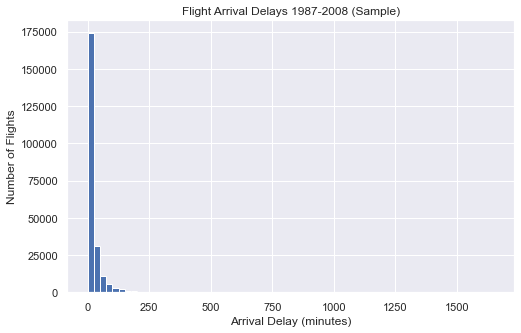

In [468]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['ArrDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'ArrDelayMinutes', bins = bins)
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Arrival Delays 1987-2008 (Sample)')
plt.show()

> There's a long tail in the distribution, so let's transform the data

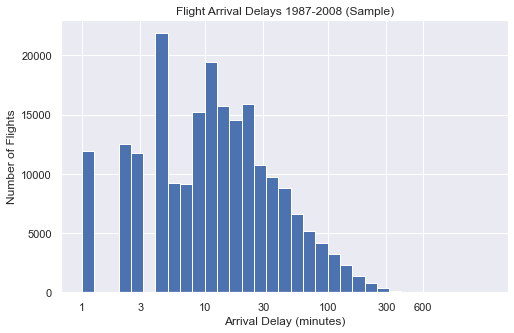

In [469]:
# let's put it on a log scale
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['ArrDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'ArrDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Arrival Delays 1987-2008 (Sample)')
plt.show()

>ArrDelayMinutes has a long-tailed distribution, with a lot of delays on the low minutes end, and few on the high minutes end. When plotted on a log-scale, the delay distribution looks *roughly* unimodal, with the highest peak between 5 and 6 minutes (over 20,000 flights, and the next highest peak between 10-15 minutes (just under 20,000 flights). 

Next up, DepDelayMinutes.

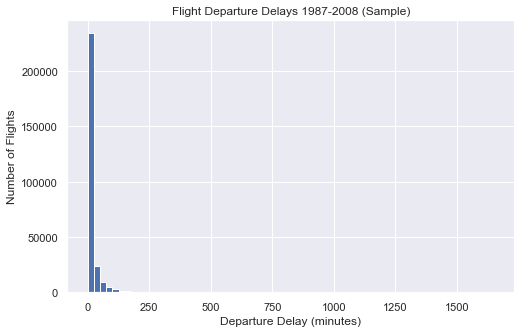

In [470]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['DepDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'DepDelayMinutes', bins = bins)
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Departure Delays 1987-2008 (Sample)')
plt.show()

> Once again there's a long tail, so we'll transform the data

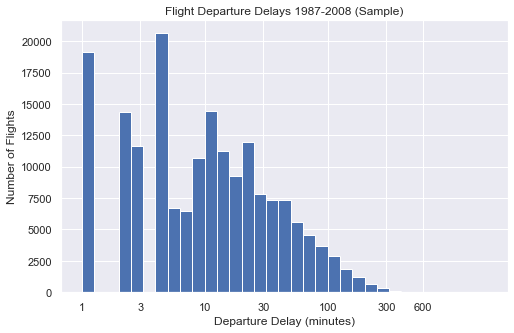

In [473]:
# let's put it on a log scale 
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['DepDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'DepDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Departure Delays 1987-2008 (Sample)')
plt.show()

>DepDelayMinutes has a long-tailed distribution similar to ArrDelayMinutes, with a lot of delays on the low minutes end, and few on the high minutes end. When plotted on a log-scale, the delay distribution looks *roughly* unimodal, with the highest peak between 5 and 6 minutes (over 20,000 flights).

Now I am curious about delays broken down by reason. We will start with Delays Due to the Carrier

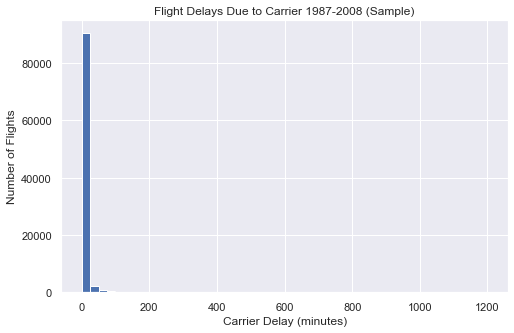

In [474]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['CarrierDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'CarrierDelayMinutes', bins = bins)
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Carrier 1987-2008 (Sample)')
plt.show()

> Once again there's a long tail in the distribution, so we'll transform the data

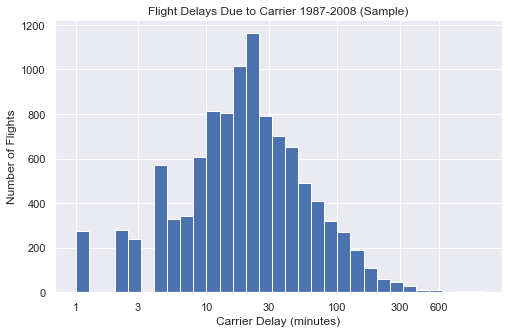

In [475]:
# let's put it on a log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['CarrierDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'CarrierDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Carrier 1987-2008 (Sample)')
plt.show()

> Carrier caused delays looks normally distributed when transformed logarithmically with the peak between 20-30 minutes (over 1,000 flights).

Next we will look at weather delays

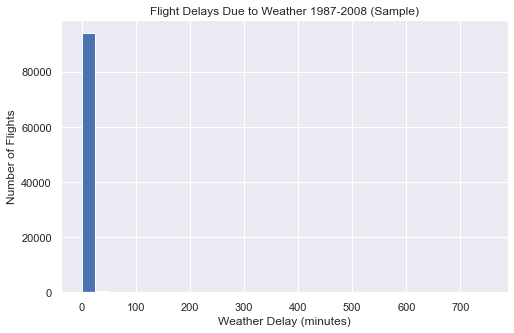

In [476]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['WeatherDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'WeatherDelayMinutes', bins = bins)
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Weather 1987-2008 (Sample)')
plt.show()

> Another long tail, let's transform

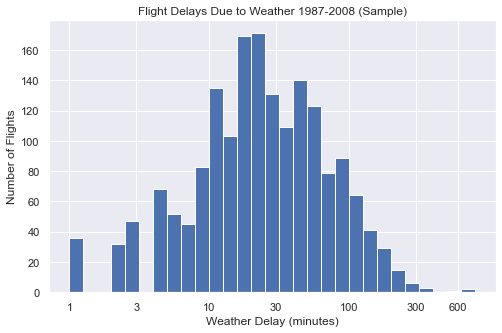

In [477]:
# let's put it on a log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['WeatherDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'WeatherDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Weather 1987-2008 (Sample)')
plt.show()

> Weather caused delays looks normally distributed when transformed logarithmically with the peak between 20-30 minutes also (over 160 flights)

Next we will look at NAS delays

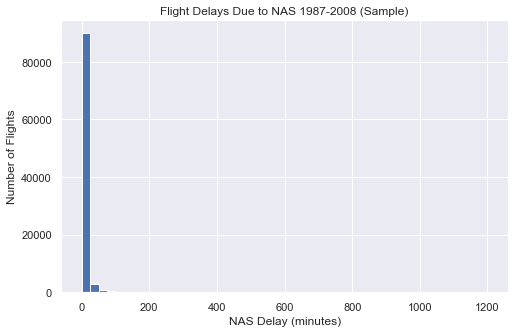

In [478]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['NASDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'NASDelayMinutes', bins = bins)
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to NAS 1987-2008 (Sample)')
plt.show()

> Let's transform

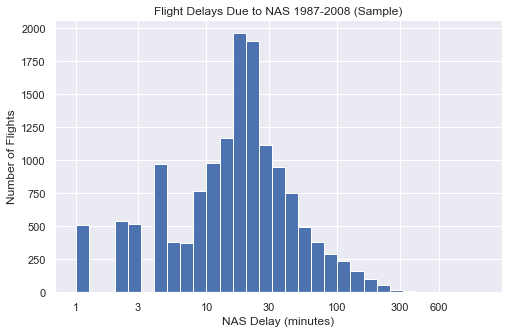

In [479]:
# log scale 
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['NASDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'NASDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to NAS 1987-2008 (Sample)')
plt.show()

> NAS caused delays looks *farily* normally distributed when transformed logarithmically with the peak between 15-30 minutes (just under 2,000 flights)

Next we will look at Security delays

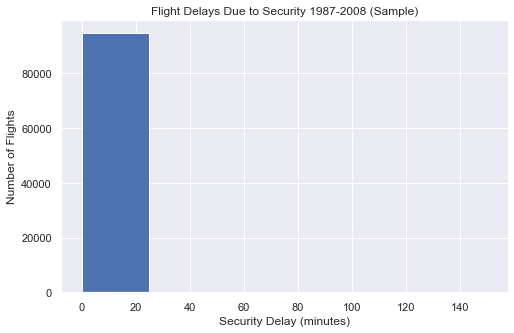

In [480]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['SecurityDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'SecurityDelayMinutes', bins = bins)
plt.xlabel('Security Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Security 1987-2008 (Sample)')
plt.show()

> This is a little interesting compared to the other charts so far

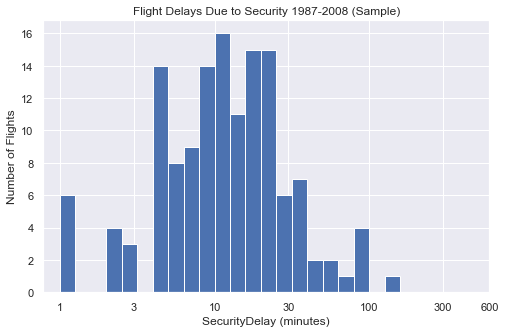

In [481]:
# there's one big cluster in the distribution, so let's put it on a log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['SecurityDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'SecurityDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('SecurityDelay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Security 1987-2008 (Sample)')
plt.show()

> Now the chart looks *roughly* normally distributed with a peak around 20 minutes (depending on the sample around 16 flights)

Let's look at Late Aircraft Arrivals

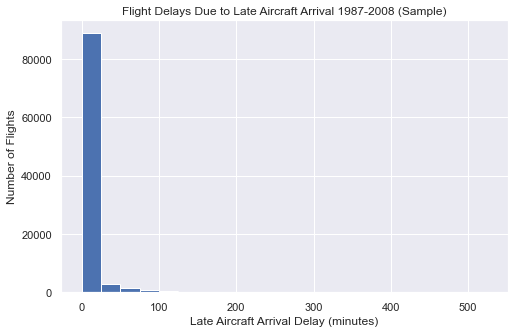

In [482]:
# start with a standard-scaled plot
binsize = 25
bins = np.arange(0, combined_flight_data['LateAircraftDelayMinutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'LateAircraftDelayMinutes', bins = bins)
plt.xlabel('Late Aircraft Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Late Aircraft Arrival 1987-2008 (Sample)')
plt.show()

> Let's transform because we see another long tail

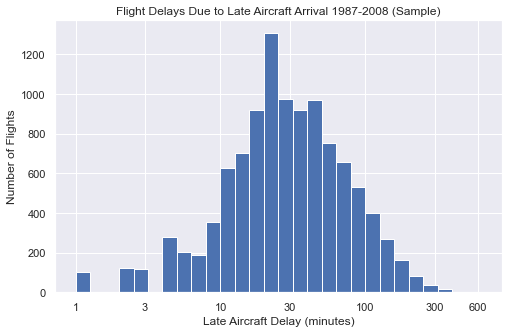

In [483]:
# transfom with log scale instead
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['LateAircraftDelayMinutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = combined_flight_data, x = 'LateAircraftDelayMinutes', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 600], [1, 3, 10, 30 ,100, 300, 600])
plt.xlabel('Late Aircraft Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Flight Delays Due to Late Aircraft Arrival 1987-2008 (Sample)')
plt.show()

> Now the chart looks *roughly* normally distributed with a peak around 20 minutes (around 1,200 flights)

While all the charts were logarithmically transformed into normal distributions that were centered roughly around 20-30 minutes, it appears that NAS was the reason for the most flight delays (peak just under 2,000), Late Arriving Aircraft was second (peak just under 1,200) with Carrier close behind (peak around 1,000 flights), Weather was significantly less (peak around 160) and Security was the least (peak was around 16 flights)

See below

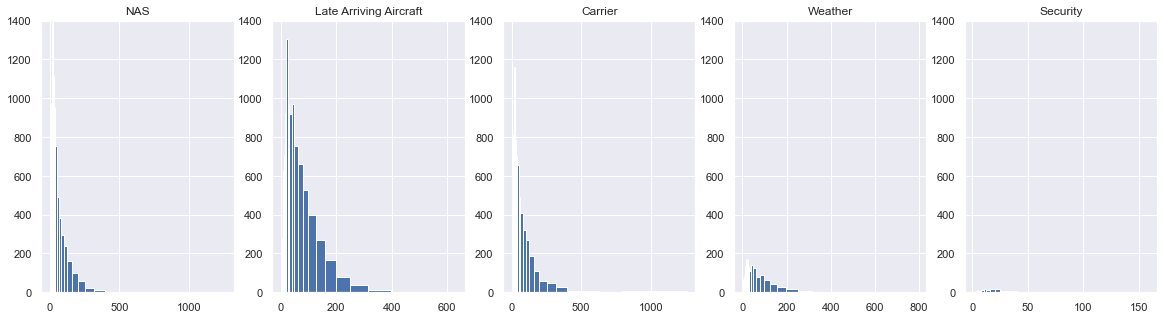

In [484]:
# Let's show these plots side-by-side to illustrate the difference in peak counts

plt.figure(figsize=[20,5])

plt.subplot(1,5,1)
log_binsize = .1
bins = 10 ** np.arange(0, np.log10(combined_flight_data['NASDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = combined_flight_data, x = 'NASDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('NAS')

plt.subplot(1,5,2)
bins = 10 ** np.arange(0, np.log10(combined_flight_data['LateAircraftDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = combined_flight_data, x = 'LateAircraftDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Late Arriving Aircraft')

plt.subplot(1,5,3)
bins = 10 ** np.arange(0, np.log10(combined_flight_data['CarrierDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = combined_flight_data, x = 'CarrierDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Carrier')

plt.subplot(1,5,4)
bins = 10 ** np.arange(0, np.log10(combined_flight_data['WeatherDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = combined_flight_data, x = 'WeatherDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Weather')

plt.subplot(1,5,5)
bins = 10 ** np.arange(0, np.log10(combined_flight_data['SecurityDelayMinutes'].max())+log_binsize, log_binsize)
plt.hist(data = combined_flight_data, x = 'SecurityDelayMinutes', bins = bins);
plt.ylim(0,1400)
plt.title('Security');


> This made me wonder about cancellation codes, let's look a that:

Note: Cancellation codes seem to be associated with flights that have null ArrTime or DepTime. When these are dropped, there are no longer any entries with cancellation codes. This makes sense because when flights are cancelled, there are no actual Arrival or Departure Times

In [486]:
# NOTE: This code will result in errors when there are no cancellation codes after dataset cleanup.
# Mardown comments below came from analysis that was performed before removing null ArrTime and DepTime

# Let's plot the reason for flight cancellations
default_color = sb.color_palette()[0]

# Determine descending order to make chart easier to read
code_counts = combined_flight_data.CancellationCode.value_counts()
code_order = code_counts.index

plt.figure(figsize=[8,8])
g = sb.countplot(data = combined_flight_data, x = 'CancellationCode', order = code_order, color = default_color);
plt.xlabel('A = Carrier     B = Weather     C = NAS     D = Security')
plt.ylabel('Count')
plt.title('Flight Cancellation Reason')
plt.show(g)

ValueError: min() arg is an empty sequence

<Figure size 576x576 with 0 Axes>

> This chart seems to show that most cancellations (vs. delays) are due to the carrier and weather

Now let's look at the percentage of cancelled flights

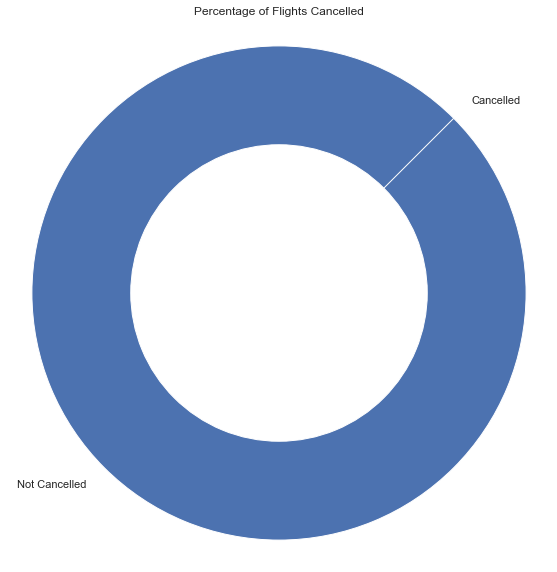

In [487]:
# Let's plot the percentage of flight cancellations
cancel_counts = combined_flight_data.Cancelled.value_counts()
label = ['Not Cancelled', 'Cancelled']
plt.pie(cancel_counts, labels=label, startangle = 45, counterclock= False, wedgeprops={'width': 0.4});
plt.axis('square');
plt.title('Percentage of Flights Cancelled');

> Very few flights are cancelled as a percentage of total flights (before null ArrTime/DepTime are dropped)

Let's look at Diverted Flights

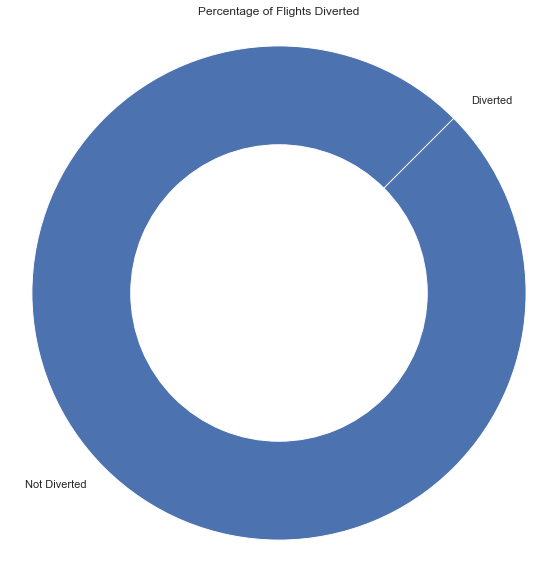

In [450]:
# Let's plot the percentage of diverted flights
diverted_counts = combined_flight_data.Diverted.value_counts()
label = ['Not Diverted', 'Diverted']
plt.pie(diverted_counts, labels=label, startangle = 45, counterclock= False, wedgeprops={'width': 0.4});
plt.axis('square');
plt.title('Percentage of Flights Diverted');

> An even smaller percentage of flights get diverted (before null ArrTime and DepTime are dropped)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> All the various delay related variables had a wide range of values so I performed log transformations on all of them. The result was basically normal distributions throughout with peak values around 20 minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

